<a href="https://colab.research.google.com/github/O-Kpy/Kaggle/blob/main/titanic_modeling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('whitegrid')
import warnings
warnings.filterwarnings('ignore')

In [2]:
train = pd.read_csv('/content/drive/MyDrive/dataset/kaggle/titanic_train.csv')
test = pd.read_csv('/content/drive/MyDrive/dataset/kaggle/titanic_test.csv')

In [3]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [22]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
 11  Title        418 non-null    object 
dtypes: float64(2), int64(4), object(6)
memory usage: 39.3+ KB


In [9]:
train['Title'] = train.Name.apply(lambda x: x.split(', ')[1].split('.')[0])

In [11]:
test['Title'] = test.Name.apply(lambda x: x.split(', ')[1].split('.')[0])

In [18]:
train['Title'].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Rare'], dtype=object)

In [19]:
test['Title'].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Rare'], dtype=object)

In [17]:
train['Title'].replace(['Dr','Rev','Major', 'Col', 'Jonkheer', 'Countess', 'Sir', 'Don', 'Capt', 'Dona', 'the Countess'], 'Rare', inplace=True)
train['Title'].replace(['Mlle','Ms','Lady'], 'Miss', inplace=True)
train['Title'].replace('Mme', 'Mrs', inplace=True)
test['Title'].replace(['Dr','Rev','Major', 'Col', 'Jonkheer', 'Countess', 'Sir', 'Don', 'Capt', 'Dona'], 'Rare', inplace=True)
test['Title'].replace(['Mlle','Ms','Lady'], 'Miss', inplace=True)
test['Title'].replace('Mme', 'Mrs', inplace=True)

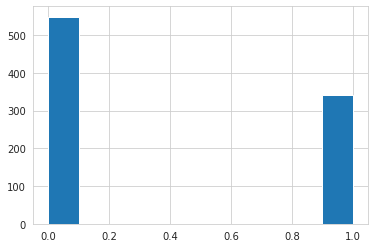

In [21]:
train.Survived.hist()

In [31]:
def missing(data):
  missing_sum = data.isnull().sum()
  missing_percent = round(missing_sum/len(data)*100, 2)

  missing_table = pd.concat([missing_sum, missing_percent], axis=1, keys=['Sum', 'Percent']).sort_values(by='Percent', ascending=False)
  return missing_table

In [129]:
missing(train)

,Sum,Percent
Survived,0,0.0
Age,0,0.0
Pclass,0,0.0
Sex,0,0.0
SibSp,0,0.0
Parch,0,0.0
Fare,0,0.0
Embarked,0,0.0
Title,0,0.0


In [130]:
missing(test)

,Sum,Percent
Age,0,0.0
Pclass,0,0.0
Sex,0,0.0
SibSp,0,0.0
Parch,0,0.0
Fare,0,0.0
Embarked,0,0.0
Title,0,0.0


In [33]:
train[train.Embarked.isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN,Miss
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN,Mrs


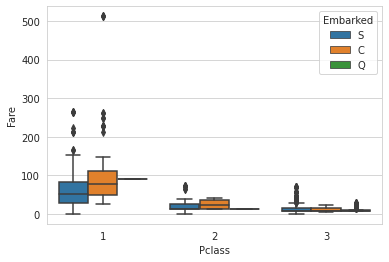

In [35]:
sns.boxplot(x=train['Pclass'], y=train['Fare'], hue=train['Embarked'])

In [37]:
train['Embarked'].fillna('C', inplace=True)

In [40]:
test[test.Fare.isnull()]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
152,1044,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,NaN,NaN,S,Mr


In [41]:
test.loc[(test['Fare'].isnull()), 'Fare'] = test[(test.Pclass==3)&(test.Embarked=='S')]['Fare'].mean()

In [55]:
train = train.drop(['Name'], axis=1)
test = test.drop(['Name'], axis=1)

In [59]:
train = train.drop(['Ticket'], axis=1)
test = test.drop(['Ticket'], axis=1)

In [62]:
from sklearn.preprocessing import LabelEncoder

In [73]:
for i in train.select_dtypes(include='object').columns:
  encoders = LabelEncoder()
  train[i] = encoders.fit_transform(train[i])

In [75]:
for i in test.select_dtypes(include='object').columns:
  encoders = LabelEncoder()
  test[i] = encoders.fit_transform(test[i])

In [83]:
train_Age = train.Age
test_Age = test.Age

In [85]:
train = train.drop(['Age'], axis=1)
test = test.drop(['Age'],axis=1)

In [88]:
train = pd.concat([train_Age, train], axis=1)
test = pd.concat([test_Age, test], axis=1)

In [94]:
train_Survived = train.Survived

In [95]:
train = train.drop(['Survived'], axis=1)

In [97]:
train_notnull = train[train['Age'].notnull()]
train_notnull_x = train_notnull.loc[:,'Pclass':]
train_notnull_y = train_notnull['Age']

In [106]:
test_isnull = train[train['Age'].isnull()]
test_isnull_x = test_isnull.loc[:,'Pclass':]
test_isnull_y = test_isnull['Age']

In [173]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor, ExtraTreesClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.linear_model import LogisticRegression
import xgboost as xgb
import lightgbm as lgbm
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, plot_confusion_matrix, roc_auc_score, cohen_kappa_score

In [116]:
model_rf = RandomForestRegressor(n_estimators=500, n_jobs=-1)
model_rf.fit(train_notnull_x, train_notnull_y)
y_pred = model_rf.predict(test_isnull_x)

In [118]:
train.loc[train.Age.isnull(), 'Age'] = y_pred

In [124]:
test_train_notnull = test[test['Age'].notnull()]
test_train_notnull_x = test_train_notnull.loc[:,'Pclass':]
test_train_notnull_y = test_train_notnull['Age']

test_test_isnull = test[test['Age'].isnull()]
test_test_isnull_x = test_test_isnull.loc[:,'Pclass':]
test_test_isnull_y = test_test_isnull['Age']

model_rf.fit(test_train_notnull_x, test_train_notnull_y)
y_pred_test = model_rf.predict(test_test_isnull_x)

test.loc[test.Age.isnull(), 'Age'] = y_pred_test

In [128]:
train = pd.concat([train_Survived, train], axis=1)

In [131]:
x = train.drop(['Survived'], axis=1)
y = train['Survived']

In [178]:
from sklearn.preprocessing import robust_scale
x = pd.DataFrame(robust_scale(x), columns=x.columns)

In [180]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.25, random_state=1234)

accuracy: 0.8026905829596412
cohen_kappa_score: 0.5844837808079952
roc_auc_score: 0.7872544122544124
              precision    recall  f1-score   support

           0       0.81      0.87      0.84       132
           1       0.79      0.70      0.74        91

    accuracy                           0.80       223
   macro avg       0.80      0.79      0.79       223
weighted avg       0.80      0.80      0.80       223



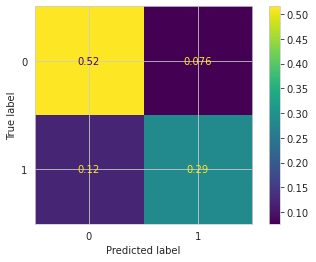

In [181]:
model_logistic = LogisticRegression(C=.8)
model_logistic.fit(x_train, y_train)
y_pred_logistic = model_logistic.predict(x_test)
print('accuracy:', accuracy_score(y_test, y_pred_logistic))
print('cohen_kappa_score:', cohen_kappa_score(y_test, y_pred_logistic))
print('roc_auc_score:', roc_auc_score(y_test, y_pred_logistic))
print(classification_report(y_test, y_pred_logistic))
plot_confusion_matrix(model_logistic, x_test, y_test, normalize='all')

accuracy: 0.7937219730941704
cohen_kappa_score: 0.5640829508754037
roc_auc_score: 0.7762654012654012
              precision    recall  f1-score   support

           0       0.80      0.87      0.83       132
           1       0.78      0.68      0.73        91

    accuracy                           0.79       223
   macro avg       0.79      0.78      0.78       223
weighted avg       0.79      0.79      0.79       223



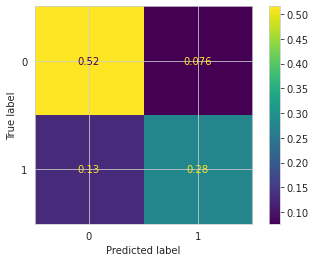

In [182]:
model_svc_lin = SVC(C=.8, kernel='linear', )
model_svc_lin.fit(x_train, y_train)
y_pred_svc_lin = model_svc_lin.predict(x_test)
print('accuracy:', accuracy_score(y_test, y_pred_svc_lin))
print('cohen_kappa_score:', cohen_kappa_score(y_test, y_pred_svc_lin))
print('roc_auc_score:', roc_auc_score(y_test, y_pred_svc_lin))
print(classification_report(y_test, y_pred_svc_lin))
plot_confusion_matrix(model_svc_lin, x_test, y_test, normalize='all')

accuracy: 0.8251121076233184
cohen_kappa_score: 0.6348713212141568
roc_auc_score: 0.8147269397269398
              precision    recall  f1-score   support

           0       0.84      0.87      0.86       132
           1       0.80      0.76      0.78        91

    accuracy                           0.83       223
   macro avg       0.82      0.81      0.82       223
weighted avg       0.82      0.83      0.82       223



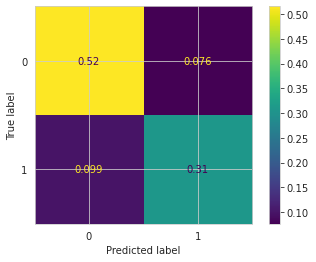

In [183]:
model_svc_rbf = SVC(C=.8, kernel='rbf', )
model_svc_rbf.fit(x_train, y_train)
y_pred_svc_rbf = model_svc_rbf.predict(x_test)
print('accuracy:', accuracy_score(y_test, y_pred_svc_rbf))
print('cohen_kappa_score:', cohen_kappa_score(y_test, y_pred_svc_rbf))
print('roc_auc_score:', roc_auc_score(y_test, y_pred_svc_rbf))
print(classification_report(y_test, y_pred_svc_rbf))
plot_confusion_matrix(model_svc_rbf, x_test, y_test, normalize='all')

accuracy: 0.8340807174887892
cohen_kappa_score: 0.6511942506869584
roc_auc_score: 0.8205960705960705
              precision    recall  f1-score   support

           0       0.84      0.89      0.86       132
           1       0.83      0.75      0.79        91

    accuracy                           0.83       223
   macro avg       0.83      0.82      0.83       223
weighted avg       0.83      0.83      0.83       223



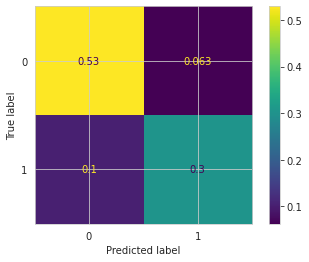

In [184]:
model_decision = DecisionTreeClassifier(max_depth=4)
model_decision.fit(x_train, y_train)
y_pred_decision = model_decision.predict(x_test)
print('accuracy:', accuracy_score(y_test, y_pred_decision))
print('cohen_kappa_score:', cohen_kappa_score(y_test, y_pred_decision))
print('roc_auc_score:', roc_auc_score(y_test, y_pred_decision))
print(classification_report(y_test, y_pred_decision))
plot_confusion_matrix(model_decision, x_test, y_test, normalize='all')

accuracy: 0.8026905829596412
cohen_kappa_score: 0.5887678122380553
roc_auc_score: 0.7923742923742925
              precision    recall  f1-score   support

           0       0.82      0.85      0.84       132
           1       0.77      0.74      0.75        91

    accuracy                           0.80       223
   macro avg       0.80      0.79      0.79       223
weighted avg       0.80      0.80      0.80       223



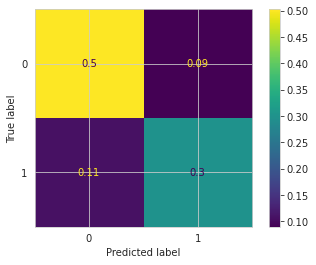

In [186]:
model_rf = RandomForestClassifier(n_estimators=100, n_jobs=-1)
model_rf.fit(x_train, y_train)
y_pred_rf = model_rf.predict(x_test)
print('accuracy:', accuracy_score(y_test, y_pred_rf))
print('cohen_kappa_score:', cohen_kappa_score(y_test, y_pred_rf))
print('roc_auc_score:', roc_auc_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))
plot_confusion_matrix(model_rf, x_test, y_test, normalize='all')

accuracy: 0.8340807174887892
cohen_kappa_score: 0.6462897072062417
roc_auc_score: 0.8137695637695638
              precision    recall  f1-score   support

           0       0.82      0.92      0.87       132
           1       0.86      0.70      0.78        91

    accuracy                           0.83       223
   macro avg       0.84      0.81      0.82       223
weighted avg       0.84      0.83      0.83       223



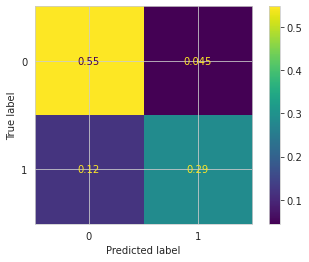

In [187]:
model_xgb = xgb.XGBClassifier(n_estimators=100, n_jobs=-1)
model_xgb.fit(x_train, y_train)
y_pred_xgb = model_xgb.predict(x_test)
print('accuracy:', accuracy_score(y_test, y_pred_xgb))
print('cohen_kappa_score:', cohen_kappa_score(y_test, y_pred_xgb))
print('roc_auc_score:', roc_auc_score(y_test, y_pred_xgb))
print(classification_report(y_test, y_pred_xgb))
plot_confusion_matrix(model_xgb, x_test, y_test, normalize='all')

accuracy: 0.7982062780269058
cohen_kappa_score: 0.58014309024727
roc_auc_score: 0.7885864135864136
              precision    recall  f1-score   support

           0       0.82      0.84      0.83       132
           1       0.76      0.74      0.75        91

    accuracy                           0.80       223
   macro avg       0.79      0.79      0.79       223
weighted avg       0.80      0.80      0.80       223



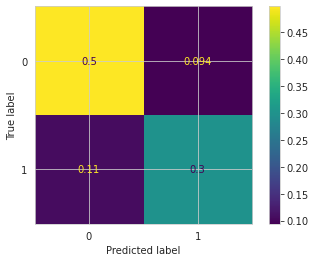

In [188]:
model_extra = ExtraTreesClassifier()
model_extra.fit(x_train, y_train)
y_pred_extra = model_extra.predict(x_test)
print('accuracy:', accuracy_score(y_test, y_pred_extra))
print('cohen_kappa_score:', cohen_kappa_score(y_test, y_pred_extra))
print('roc_auc_score:', roc_auc_score(y_test, y_pred_extra))
print(classification_report(y_test, y_pred_extra))
plot_confusion_matrix(model_extra, x_test, y_test, normalize='all')